In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import cv2 as cv
import glob
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from mpl_toolkits.mplot3d import Axes3D

input_folder="Photos/"

# Obtener siluetas de un conjunto de imágenes

Una vez realizado las imágenes a las distintas figuras, el siguiente paso será **obtener las siluetas de las mismas.**

- 1º **Transformar imagen a niveles de grises:**
- 2º **Eliminar ruido de la imagen gris:** Para este filtrado, se prefirió utilizar un filtrado de suavizado por media, ya que devolvía mejores resultados que el suavizado por Gauss.
- 3º **Capturar contorno de la imagen suavizada**
- 4º **Con ese contorno umbralizado, se aplica operación morfológica de cierre para unir contornos incompletos**
- 5º **Con este nuevo contorno, se rellena y se obtiene la silueta**



**EXPERIMENTACIONES REALIZADAS:**
- 1º**Aplicar realce de Laplance:** Al hacerlo después del suavizado,esto no sólo realzaba la figura, sino la imagen entera, por lo que a la hora de umbralizar hay partes de las imágenes que son detectadas que no pertenecen a la figura, por lo que tras aplicar varias transformaciones estas se expanden.

In [46]:
def get_silhouettes_from_input_folder(input_folder_location,exit_folder_location,apply_trim=False):
    silhouettes=[]
    content = os.listdir(input_folder_location)
    extensions=[".jpg",".png",".jpeg"]
    for file in content:
        if os.path.isfile(os.path.join(input_folder_location,file)) and os.path.splitext(file)[1].lower() in extensions:
            sil=get_silhouette_from_image(os.path.join(input_folder_location,file),apply_trim)
            silhouettes.append(sil)
    return silhouettes

def trim_image(image,margen):
        gris = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        #margen=0.16
        color = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        h=color.shape[0]
        w=color.shape[1]
        margen_h=int(h*margen)
        margen_w=int(w*margen)
        color=color[int(h/2)-margen_h:int(h/2)+margen_h,int(w/2)-margen_w:int(w/2)+margen_w]
        image = color
        return image

def get_silhouette_from_image(input_image,apply_trim=False):
    original = cv.imread(cv.samples.findFile(input_image))

    #If you need to apply a trim operation, trim my image
    if(apply_trim):
        original=trim_image(original,margen=0.16)

    #Applying blur to obtain outline
    gris = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
    median = cv.medianBlur(gris,5)
    canny = cv.Canny(median, 0, 150)
    (contornos,_) = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    #After obtain the outline, close the outline to be able to fill it
    black_background = np.zeros_like(original)
    cv.drawContours(black_background, contornos, -1, (0, 255, 0), -1)
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,20))
    imagen_cerrada = cv.morphologyEx(canny, cv.MORPH_CLOSE, kernel)
    (contornos,_) = cv.findContours(imagen_cerrada.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    #After obtain the outline, fill it up
    black_background = np.zeros_like(original)
    cv.drawContours(black_background, contornos, -1,(255,255,255), -1)
    plt.imshow(black_background)
    plt.figure()
    return black_background
    

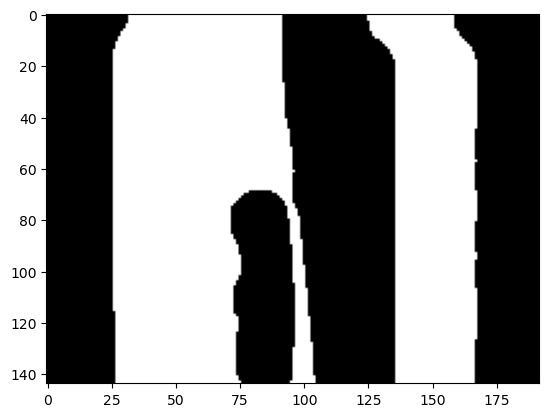

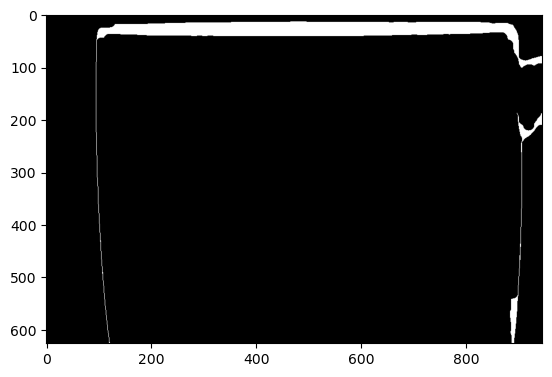

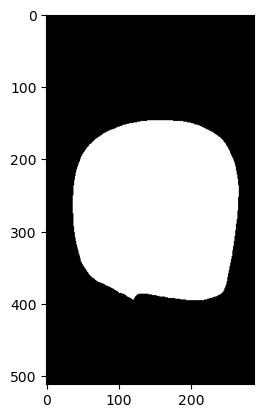

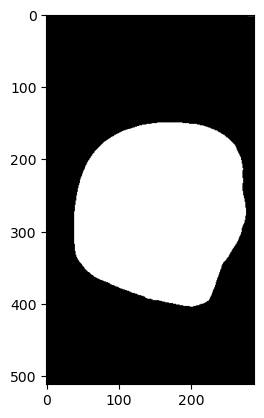

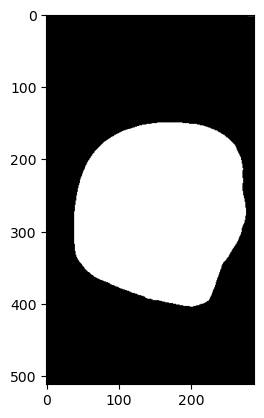

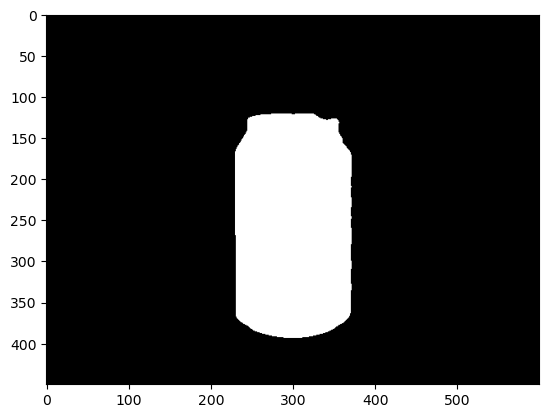

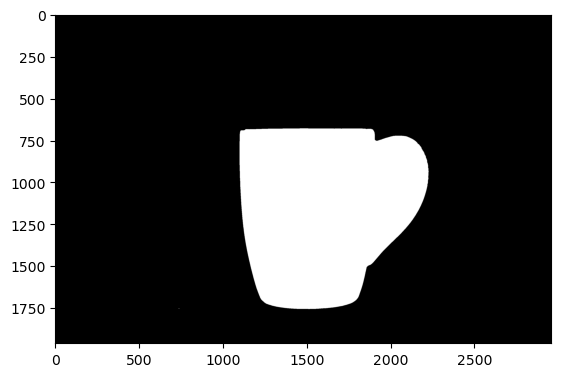

<Figure size 640x480 with 0 Axes>

In [47]:
data=get_silhouettes_from_input_folder(input_folder,"Photos/",True)
len(data)
d=get_silhouette_from_image("Photos/cocacola.jpg",False)
d1=get_silhouette_from_image("Photos/taza.jpg",False)

In [4]:
cv.imwrite("silueta1.jpg",data[2])
cv.imwrite("silueta2.jpg",data[3])
silueta1=cv.imread("silueta1.jpg")
silueta2=cv.imread("silueta2.jpg")

print(silueta1.shape)
print(silueta2.shape)


(512, 288, 3)
(512, 288, 3)
